In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

RFM

In [9]:
data_clients = pd.read_csv('./datasets/data_clients.csv')
df = data_clients.copy()
df.reset_index(inplace=True)

In [11]:
df_original = pd.read_csv('./datasets/sales.csv')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 3, saw 8


In [ ]:

from datetime import datetime

In [ ]:
df3 = df_original.copy()
df3.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,NaN,1,680,680,172,3,2 017,NaN,Возврат,Москва,508,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,NaN,1,379,379,"209,8",3,2 017,23111,Доставлен,Регионы,"169,2",0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,NaN,1,3 325,3 325,1 149,3,2 017,23111,Доставлен,Регионы,2 176,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,NaN,1,330,330,"166,96",3,2 017,NaN,Доставлен,Москва,"163,04",0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,NaN,1,199,199,79,3,2 017,23111,Доставлен,Регионы,120,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN


In [ ]:
df_original['Дата'] = pd.to_datetime(df_original['Дата'], format='mixed')
df3.rename(columns={'Телефон_new': 'id'}, inplace=True)

In [ ]:
df_merged = df.merge(
    df3[['id', 'Дата']],
    on='id',
    how='left'
)

In [ ]:
print(df_merged[['id', 'Дата']].head())

                        id              Дата
0  55575453-56535648535679  01.03.2017 12:22
1  55575453-56535648535679  01.03.2017 12:22
2  55575453-56535648535679  01.03.2017 12:22
3  55575453-56535648535679  01.03.2017 12:22
4  55575453-56535648535679  01.03.2017 12:22


In [ ]:
df_rfm = df.copy()

In [ ]:
current_date = datetime.now()

df_merged['Дата'] = pd.to_datetime(df_merged['Дата'], format='%d.%m.%Y %H:%M', errors='coerce')

current_date = datetime.now()

df_rfm['Recency'] = (current_date - df_merged['Дата']).dt.days

# Заполнение остальных метрик
df_rfm['Frequency'] = df['Количество']
df_rfm['Monetary'] = df['СРЕДНИЙ ЧЕК']

In [ ]:
df_rfm.head()

,index,id,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ ПИТАНИЕ,Безналичная,Наличная,Уральский ф.о.,Приволжский ф.о.,Центральный ф.о.,Южный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,Количество,Маржа,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Recency,Frequency,Monetary
0,0,55575453-56535648535679,0.300000,0.1,0.0,0.0,0.300000,0.0,0.000000,0.3,0.000000,0.000000,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,811.39,1,10.0,3759.0,3031,10.0,3759.0
1,1,55574854-56495552515179,0.000000,0.5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.500000,0.000000,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,204.07,1,4.0,528.0,3031,4.0,528.0
2,2,55574948-52515357485779,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,758.91,2,3.0,1098.0,3031,6.0,1098.0
3,3,55574851-55504856515370,0.142857,0.0,0.0,0.0,0.000000,0.0,0.428571,0.0,0.428571,0.000000,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,2628.51,1,7.0,13550.0,3031,7.0,13550.0
4,4,55574948-52504948534879,0.444444,0.0,0.0,0.0,0.222222,0.0,0.111111,0.0,0.000000,0.222222,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,9.0,1510.13,2,4.5,3119.5,3031,9.0,3119.5


In [ ]:
df_rfm['R_score'] = pd.qcut(df_rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
df_rfm['F_score'] = pd.qcut(df_rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
df_rfm['M_score'] = pd.qcut(df_rfm['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

In [ ]:
df_rfm['RFM_score'] = (
    df_rfm['R_score'].astype(str) +
    df_rfm['F_score'].astype(str) +
    df_rfm['M_score'].astype(str)
)

df_rfm['RFM_total'] = df_rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)

#сегментация
def rfm_segment(x):
    if x >= 13:
        return 'Champions'
    elif x >= 10:
        return 'Loyal Customers'
    elif x >= 7:
        return 'Potential Loyalist'
    elif x >= 4:
        return 'Needs Attention'
    else:
        return 'At Risk'

df_rfm['segment'] = df_rfm['RFM_total'].apply(rfm_segment)

In [ ]:
df_rfm.head()

,index,id,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ ПИТАНИЕ,Безналичная,Наличная,Уральский ф.о.,Приволжский ф.о.,Центральный ф.о.,Южный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,Количество,Маржа,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_total,segment
0,0,55575453-56535648535679,0.300000,0.1,0.0,0.0,0.300000,0.0,0.000000,0.3,0.000000,0.000000,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,811.39,1,10.0,3759.0,3031,10.0,3759.0,1,4,5,145,10,Loyal Customers
1,1,55574854-56495552515179,0.000000,0.5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.500000,0.000000,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,204.07,1,4.0,528.0,3031,4.0,528.0,1,2,1,121,4,Needs Attention
2,2,55574948-52515357485779,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,758.91,2,3.0,1098.0,3031,6.0,1098.0,1,3,2,132,6,Needs Attention
3,3,55574851-55504856515370,0.142857,0.0,0.0,0.0,0.000000,0.0,0.428571,0.0,0.428571,0.000000,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,2628.51,1,7.0,13550.0,3031,7.0,13550.0,1,4,5,145,10,Loyal Customers
4,4,55574948-52504948534879,0.444444,0.0,0.0,0.0,0.222222,0.0,0.111111,0.0,0.000000,0.222222,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,9.0,1510.13,2,4.5,3119.5,3031,9.0,3119.5,1,4,4,144,9,Potential Loyalist


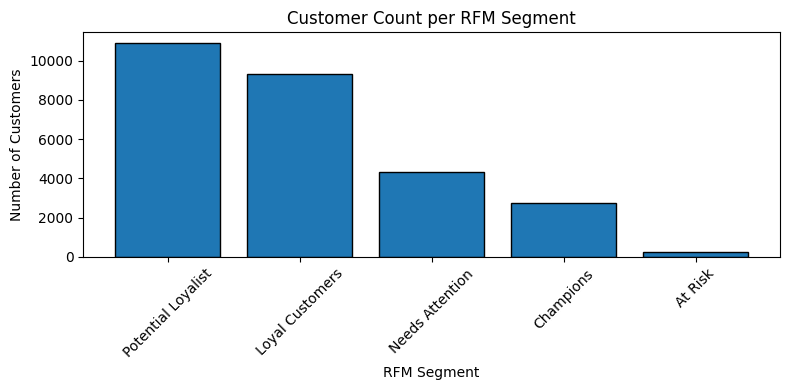

In [ ]:
#распределение RFM сегмента
counts = df_rfm['segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
plt.bar(counts.index, counts.values, edgecolor='black')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Count per RFM Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Доли категорий в R
cat_cols = [
    'Мелкая бытовая техника','Аксессуары','Цифровая Техника','Климат',
    'Сделай сам','Детские товары','ТВ-Аудио','Крупная бытовая техника',
    'Товары для дома','Спорт и активный отдых','Мебель',
    'Игры, софт и развлечения','Автотовары'
]

rfm_share_by_rfm = (
    df_rfm
    .groupby('segment')[cat_cols]
    .mean()
    .multiply(100)
    .round(1)
)
rfm_share_by_rfm.index.name = 'RFM Segment'
rfm_share_by_rfm